# Time series Analysis,  Autoregression, Moving Average and Seasonality


This is a classic approach to time series analysis,   from the field of econometrics.

It predates big data tactics, but is still in used in a number of places, you will see it appearing in business settings.

Finding good explanations/discussions of these methods is tough,   a lot of the writing on it can only be called poor.

Time series analysis uses the following terms to predict future outcomes y(t) at discrete individual values of t

      -trends in time    mt+b  
      
                     Whether to use a trend or not is a hyperparameter choice.   Modeling of trends  can be done either directly (y=mt+b,                                               or other polynomials) or we can used differencing, as discussed below
      
      -Autoregressive terms,     y(t) = a1 * y(t-1) + b2 * y(t-2)+...
      
                     where y(t) is predictd by previous values at lags k,  where k is the number of "lags",    y(t-p) is the p th lag of t
                     
                     The decision to use Autoregressive (AR) terms is a hyperparameter choice,  the value of k, the number of lags used is                                            a hyperparameter
      
      -Moving average terms,     y(t)= m1 * u(t-1)  + m2* u(t-2) + m3 * u(t-3)+...
      
                     Where u(t) are the residuals of the model,   the number of terms u(t-Q) used is called the order Q of the moving                                               average MA
                     
                     The decision to use moving Average terms (MA) is a hyperparameter choice,  the value of Q is also a choice
       
       -Differencing,    instead of working with y(t) directly, we could work with ydiff(t)=y(t)-y(t-1)
       
                       Differencing removes trends from data.  To get y(t) back we predict ydiff(t) and use y(t=0) plus the ydiff(t) values
                       to recreate the y(t) values.  This reassembly of the data is called integration (I) within this community
                       
                       It is possible to work with the first difference (d=1) or the differerence of differences (d=2)
                       
                       The level of differencing to use is a hyperparameter
                       
        -Seasonality- In many types of data, there is a seasonality,  which might be a yearly cyclicity if the data is on a  daily, weekly                                            or monthly time scale.   We can use models with a seasonality term S by specifing the periodicity of the seaosons as                                           a number of intervals
                      
                      In the NO2 data we have,   we have a 24 hour seasonality term (due to vehicle traffic and temperature during each                                             day).  In data with sampling more rapid than once per day the "seasonality" may be a daily cycle, perhaps weekly
                      
                      Whether to use seasonality or not is a hyperparameter question
                
         -Exogeneous variables - if we have some external (exogenous) predictors X(t),   either univariate or multivariate,  we can build
                                 models for y(t) that include X(t) or X(t-k)
                                 
                               
                    

https://www.statsmodels.org/devel/examples/notebooks/generated/autoregressions.html

## Model Names

AR- an autoregressive model, only autoregression

MA- a moving average model

ARMA-  a mixture of Autoregressive and Moving average terms

ARIMA- Autoregressive and Moving average, with integration (I),  meaning the ability to work with differenced data of order d

SARIMA- an Arima model that also includes seasonality.    Most SARIMA models also allow for exogenous predictors X(t)


In practice:
    
    -just use SARIMA software, and turn off all the terms you don't need,  rather than dealing with 5 or 6 different prediction tools
    
Most people refer to these all as "ARIMA" models,  as a slang term for all of these

## The SARIMA modeling process

There is a traditional process associated with using ARIMA.  Much of this is largely "rule of thumb" processes for finding the best model.

1.) Format the data you you have y(t) at regular intervals or periods between samples (frequency =1/period)  

         -Make sure you have no missing data and no missing time steps
    
         -In Pandas,  set up a datetime index, so the row names are evenly spaced time steps
        
         -Pandas datatime variables track the time zone (the UTC), set this to None,  so the datetime index,  most modeling software doesn't use UTC coding

2.)  Look for evidence of trend and of seasonality

      -There are specialized plots that use a smoothing algorithm (a LOESS filter) to estimate the trend, the seasonality term and the time series itself
        A LOESS or STL (seasonality-trend-loess) plot will split the time series up into seasonality, trend and time series
        
            -You may also have "domain" knowledge about seasonality in the data
            -There are tests for the presence of trend terms
            
            -Most SARIMA software will run an ANOVA and tell you whether or not terms are statistically significant, so if you think there is
            seasonality and trend,  include the terms and see if they are significant
            
     -In dealing with trends you can either include a specific trend term,  or use differencing.   Don't use both at the same time, this is a one or the other choice
            In some ways,  it looks to me like differencing is more effective, there are less assumptions.
        
      -If you are using differencing,   repeat the LOESS or STL plot to see if the differencing has removed the trend.  The order of differencing to use is D

3.) Deciding the lag value (P) and number of terms (Q)

       -Look at the Autocorrelation plot (ACF) of y or the differenced y,  which shows the magnitude of the correlation between y(t) and y(t-k),  which is the autocorrelation at a lag k.   The plot will show
        you the autocorrelation at varisous values of K,  take Q as the highest order of the moving average term.
        
        -Look at the partial autocorrelation plot (PACF) which shows the autocorrelation corrected for lower order lags,   the correlation of y(t) with j(t-k) given all the 
        other lagged values between 1 and K-1.     The last significant partial autocorrelation term is order of the Autoregression terms P to use
        
4.)   At this point you know

            - if you have a trend, and if you are using differencing or not.  The order of differencing D is 0,1,2,..
                    D=0 is no differncing.   Don't use both differencing and a modeling trend, it's one or the other.
                
            - The values P and Q that set the order of the Autoregressive terms
            
            - Whether or not there is seasonality and the period of the seasonality

5.)   Build a SARIMA model,  and see if all your terms are significant.  Remove non-significant terms and build the model again

6.)   If you are uncertain about the level of differencing to use, try two different values (0 vs 1, or 1 vs 2),  differencing of more than 2 seems
              unlikely to be useful.    If you change the differencing (D),  recalculate the P and Q values

7.)  If you have several possible models,  you can compare them using the Aikake Information Critera (AIC).  The AIC estimates the Kullback-Liebler distance between
            the model predictions and the data y(t).  The model with the lowest distance (lowest AIC score) is the best model.  Any model with an AIC socre that is within
            2 of the best model should be considered as viable and considered (there is a more complex way to work with AIC, this is a rule of thumb).

8.) For each model,  look at diagnostic plots of the residuals,  look at a Q-Q plot and a histogram, as well as at autocorrelation of the residuals
          
           -we want normal residuals
                  -the histogram should look normal
                  -the Q-Q plot should be pretty much a straight line
                
           -residuals should not have any autocorrelation (if they do, increase your P value)

Find your best model and then look at some predictions:

9.)  Predict the y values over the range of times where you have data y(t)

10.) Forecast future values of y(t) for future times.   Most software will give you an estimated confidence interval on the predictions,    it will rapidly increase as
     time passes, since successive values of y depend on previous estimated values,  so the error compounds rapidly.
 
        
       

https://www.statsmodels.org/devel/examples/notebooks/generated/autoregressions.html

### Pandas Tutorial for time series analysis setup

https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html

Watermarking is at the end of this notebook

In [1]:
import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order


In [2]:
import easygui as g

title = 'Please select a File'
filename = g.fileopenbox( title )

In [10]:
## Load the dataset

In [3]:
#This is the data set "air_quality_no2_long.csv' which is air quality measurements (NO2 concentrations) in 3 cities,  recorded on
# an hourly basis

air_quality = pd.read_csv(filename)

air_quality = air_quality.rename(columns={"date.utc": "datetime"})

air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [4]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

# Preparing Data for a Time Series Analysis

The data in a time series analysis has to have a very specific form.  At the moment, we are talking about a univariate time series for an outcome y(t),   vector response Y(t) are 
also popular.

To use the Python tools for 

## Convert a column to a python datetime variable from a string

Keep your original column values,  as we will soon see Python datetimes are kind of a nightmare

In [5]:
# create a new datetime column converting from a string to the pytthon date time format


air_quality["datetime2"] = pd.to_datetime(air_quality["datetime"],infer_datetime_format=True)
air_quality['datetime2']

C:\Users\dev46\AppData\Local\Temp\ipykernel_18788\1784043685.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  air_quality["datetime2"] = pd.to_datetime(air_quality["datetime"],infer_datetime_format=True)


0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime2, Length: 2068, dtype: datetime64[ns, UTC]

## Notice a couple of things at this point:

The datetaime2 variable is in UTC or Coordinated Universal Time,  and there is no frequency listing

When we start to use Time Series modeling,    we will find that there are some problems with this

     -Time series models work on "time steps",  not datatimes,   so timeseries models really need to know the frequency of the time step
       or the period (period =1/freqeuncy).   This data set was collected every hour, as we can see by the timesteps,  but this is not 
       explicitly stored anywhere.
    
     -Time series predicitons are "Time zone naive" meaning they don't know what time zone we are working with
        
So we need to do the following: 

    -Do a little exploratory data analysis

    -Split up the data for the 3 cities in this data set into 3 individual pandas times series

    -set up a time based index for the data by setting the index of the data to the datetime2 variable

    -check for missing data and interpolate all the missing data points,  where possible

     -remove the time zone tracking (UTC) from the dataset,  since the time series model can't work with this
        
    -set the frequency of the data by resampling it at one hour intervals
    
Here is the nighmare portion of all this

     -Many of these steps remove the frequency setting,   others seem to reset the time zone.    Aargh!
    
     -I figured this out the hard way, by experimentation.

If you are working with time series data,  check the index values after every single step.   Every one.  Change the order of your operations to 
so that you wind up with the right format on the index

The index needs to be "Time zone naive",  it needs to have a sampling frequency set and you need to have no missing data


Note the similarity with spatial data

            -You need to have the same CRS spatially, the same time zone in time series
            -Not all CRS or all time zones work for all pieces of code or calculations
            -Time series work with uniformly spaced time steps,   spatial analyis uses regions
                Time series have to have uniformly spaced time steps, resample your data to evenly space time points
                

In [6]:
# what time range are we working with - note the time zone, tz, tracking 

air_quality["datetime2"].min(), air_quality["datetime2"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [7]:
# What ranges of times are we working with

air_quality["datetime2"].max() - air_quality["datetime2"].min()

Timedelta('44 days 23:00:00')

In [9]:
# add a month column to the data set,  we can also get days of the week which might be interesting as well
air_quality["month"] = air_quality["datetime2"].dt.month

In [10]:
air_quality.groupby([air_quality["datetime2"].dt.weekday, "city"])["value"].mean()

datetime2  city     
0          Antwerpen    27.875000
           London       23.969697
           Paris        24.856250
1          Antwerpen    22.214286
           London       24.885714
           Paris        30.999359
2          Antwerpen    21.125000
           London       23.460432
           Paris        29.165753
3          Antwerpen    27.500000
           London       24.780142
           Paris        28.600690
4          Antwerpen    28.400000
           London       26.446809
           Paris        31.617986
5          Antwerpen    33.500000
           London       24.977612
           Paris        25.266154
6          Antwerpen    21.896552
           London       24.859155
           Paris        23.274306
Name: value, dtype: float64

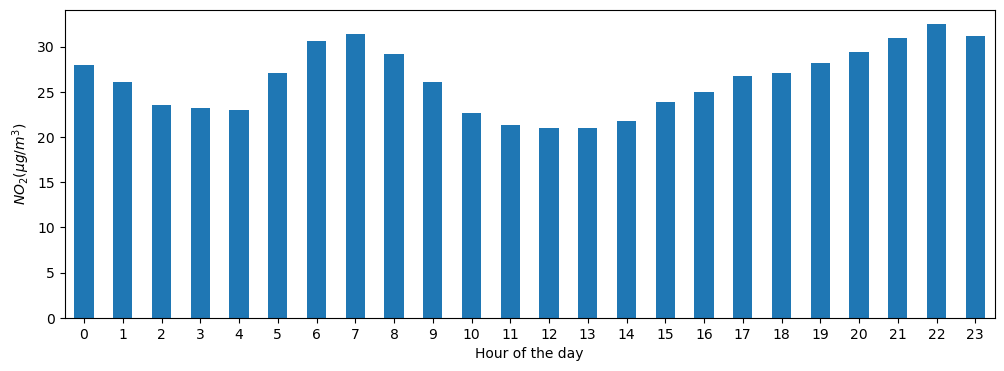

In [11]:
fig, axs = plt.subplots(figsize=(12, 4))

air_quality.groupby(air_quality["datetime2"].dt.hour)["value"].mean().plot(
    kind='bar', rot=0, ax=axs
)
plt.xlabel("Hour of the day");  # custom x label using matplotlib

plt.ylabel("$NO_2 (µg/m^3)$");


In [20]:
# now split the data up into the values for the three cities

In [12]:
no_2=air_quality.pivot(index="datetime2", columns="city", values="value")

no_2.head()

city,Antwerpen,London,Paris
datetime2,,,
2019-05-07 01:00:00+00:00,50.5,23.0,25.0
2019-05-07 02:00:00+00:00,45.0,19.0,27.7
2019-05-07 03:00:00+00:00,NaN,19.0,50.4
2019-05-07 04:00:00+00:00,NaN,16.0,61.9
2019-05-07 05:00:00+00:00,NaN,NaN,72.4


### How much missing data do we have?

In [14]:
sum(no_2.Antwerpen.isna())

938

In [15]:
sum(no_2.London.isna())

64

In [16]:
sum(no_2.Paris.isna())

29

In [17]:
no_2.shape

(1033, 3)

So

Paris and London are missing a few percent of the data,  Antwerp is missing 90% of it, so we are just not working with the Antwerp data

In [18]:
# extract data series, as Pandas data series to analyze, for London and Paris

London=no_2['London']
Paris=no_2['Paris']

In [19]:
# Interpolate to replace the missing data,   the missing points are just the average value of the two neighboring points
#   since this is a time series,  the data is ordered, so it is easy to talk about the "adjacent" values and take the average
# in a way it is like a k-nearest neighbors with k=2

London2=London.interpolate()
Paris2=Paris.interpolate()

In [21]:
# make these series both "Time Zone Naive" by turning off the time zone tracking
# the Autoregressive models we will use later don't deal well with time zone codes

London2=London2.tz_localize(None)
Paris2=Paris2.tz_localize(None)

In [24]:
# Check to be sure we got rid of the NAs
sum(London2.isna()),sum(Paris2.isna())
# Don't skip steps like this!  You will regret it later if you do.

(0, 0)

In [25]:
sum(London2.isna())

0

In [26]:
sum(Paris2.isna())

0

In [27]:
# London2.index is the time scale being used for the data points in our series
# Notice that the time zone is not set, which is good
# but the frequency value is "None",  indicating we don't know if this is a uniformly sampled time series or not

London2.index

DatetimeIndex(['2019-05-07 01:00:00', '2019-05-07 02:00:00',
               '2019-05-07 03:00:00', '2019-05-07 04:00:00',
               '2019-05-07 05:00:00', '2019-05-07 06:00:00',
               '2019-05-07 07:00:00', '2019-05-07 08:00:00',
               '2019-05-07 09:00:00', '2019-05-07 10:00:00',
               ...
               '2019-06-20 15:00:00', '2019-06-20 16:00:00',
               '2019-06-20 17:00:00', '2019-06-20 18:00:00',
               '2019-06-20 19:00:00', '2019-06-20 20:00:00',
               '2019-06-20 21:00:00', '2019-06-20 22:00:00',
               '2019-06-20 23:00:00', '2019-06-21 00:00:00'],
              dtype='datetime64[ns]', name='datetime2', length=1033, freq=None)

In [29]:
# we will now resample the time series, computing one value per hour.   The software will interpolate or average as needed to do this
# in our case, the data was already recorded once per hour,  so nothing will change, but the index will now indicate a uniform
# sampling of once per hour

# After some reflection,   some things will change.  If an entire row is missing (say 11 am on 2019-06-02), the resampling will add it to the
# data with an NA value,   so we will need to interpoate again.

London3=London2.asfreq("H")
Paris3=Paris2.asfreq("H")

# now check the data again!

In [31]:
# check for NAs,   resampling can produce nas

sum(London3.isna())

47

In [32]:
London3.shape

(1080,)

In [33]:
London2.shape

(1033,)

In [34]:
# the length of the series increased,  so there were missing time steps
London3.index

DatetimeIndex(['2019-05-07 01:00:00', '2019-05-07 02:00:00',
               '2019-05-07 03:00:00', '2019-05-07 04:00:00',
               '2019-05-07 05:00:00', '2019-05-07 06:00:00',
               '2019-05-07 07:00:00', '2019-05-07 08:00:00',
               '2019-05-07 09:00:00', '2019-05-07 10:00:00',
               ...
               '2019-06-20 15:00:00', '2019-06-20 16:00:00',
               '2019-06-20 17:00:00', '2019-06-20 18:00:00',
               '2019-06-20 19:00:00', '2019-06-20 20:00:00',
               '2019-06-20 21:00:00', '2019-06-20 22:00:00',
               '2019-06-20 23:00:00', '2019-06-21 00:00:00'],
              dtype='datetime64[ns]', name='datetime2', length=1080, freq='H')

In [35]:
sum(Paris3.isna())

47

In [36]:
Paris3.shape

(1080,)

In [37]:
## Resampling Produced some NA values

#Repeat the interpolation process
# when we are in this kind of nightmarish alteration of data sizes, timezones, etc,  don't overwrite variables!

London4=London3.interpolate()
Paris4=Paris3.interpolate()

In [38]:
sum(Paris4.isna())

0

In [39]:
sum(London4.isna())

0

In [40]:
#check to see if the index is okay or not!

London4.index

DatetimeIndex(['2019-05-07 01:00:00', '2019-05-07 02:00:00',
               '2019-05-07 03:00:00', '2019-05-07 04:00:00',
               '2019-05-07 05:00:00', '2019-05-07 06:00:00',
               '2019-05-07 07:00:00', '2019-05-07 08:00:00',
               '2019-05-07 09:00:00', '2019-05-07 10:00:00',
               ...
               '2019-06-20 15:00:00', '2019-06-20 16:00:00',
               '2019-06-20 17:00:00', '2019-06-20 18:00:00',
               '2019-06-20 19:00:00', '2019-06-20 20:00:00',
               '2019-06-20 21:00:00', '2019-06-20 22:00:00',
               '2019-06-20 23:00:00', '2019-06-21 00:00:00'],
              dtype='datetime64[ns]', name='datetime2', length=1080, freq='H')

In [41]:
Paris4.index

DatetimeIndex(['2019-05-07 01:00:00', '2019-05-07 02:00:00',
               '2019-05-07 03:00:00', '2019-05-07 04:00:00',
               '2019-05-07 05:00:00', '2019-05-07 06:00:00',
               '2019-05-07 07:00:00', '2019-05-07 08:00:00',
               '2019-05-07 09:00:00', '2019-05-07 10:00:00',
               ...
               '2019-06-20 15:00:00', '2019-06-20 16:00:00',
               '2019-06-20 17:00:00', '2019-06-20 18:00:00',
               '2019-06-20 19:00:00', '2019-06-20 20:00:00',
               '2019-06-20 21:00:00', '2019-06-20 22:00:00',
               '2019-06-20 23:00:00', '2019-06-21 00:00:00'],
              dtype='datetime64[ns]', name='datetime2', length=1080, freq='H')

### Victory!

Okay, we now have data with:
    
    -no NA values
    -a known sampling frequency
    -no timezone code- so the data is time zone Naive
    
    Geez.  THis took a long time to sort out.
    
    The various steps add in NANs and mess wiht the freq and UTC values.  Ouch

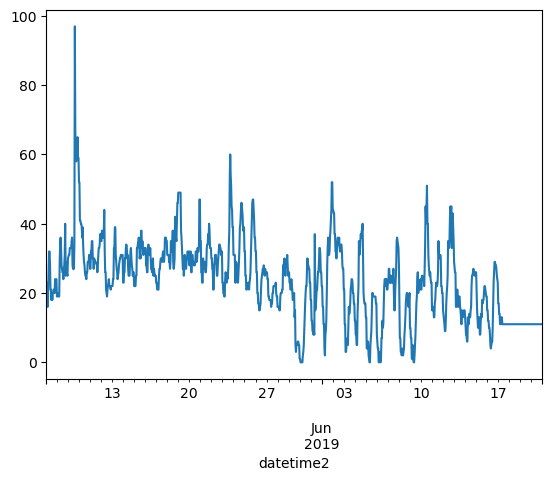

In [42]:

London4.plot();
#Paris.plot();

Okay, we do have some constant values at the end of the London data,  this is due to the interpolation, we may need to remove those.

In [43]:
London4

datetime2
2019-05-07 01:00:00    23.0
2019-05-07 02:00:00    19.0
2019-05-07 03:00:00    19.0
2019-05-07 04:00:00    16.0
2019-05-07 05:00:00    21.0
                       ... 
2019-06-20 20:00:00    11.0
2019-06-20 21:00:00    11.0
2019-06-20 22:00:00    11.0
2019-06-20 23:00:00    11.0
2019-06-21 00:00:00    11.0
Freq: H, Name: London, Length: 1080, dtype: float64

In [44]:
# we can find the index values of the London data that equals 11,  ie at the end of the series where the resampling just produced a string of 11s

London4[London4==11].index

DatetimeIndex(['2019-06-01 04:00:00', '2019-06-01 05:00:00',
               '2019-06-03 02:00:00', '2019-06-03 03:00:00',
               '2019-06-03 10:00:00', '2019-06-06 14:00:00',
               '2019-06-12 03:00:00', '2019-06-13 16:00:00',
               '2019-06-14 07:00:00', '2019-06-14 08:00:00',
               '2019-06-17 04:00:00', '2019-06-17 05:00:00',
               '2019-06-17 09:00:00', '2019-06-17 10:00:00',
               '2019-06-17 11:00:00', '2019-06-17 12:00:00',
               '2019-06-17 13:00:00', '2019-06-17 14:00:00',
               '2019-06-17 15:00:00', '2019-06-17 16:00:00',
               '2019-06-17 17:00:00', '2019-06-17 18:00:00',
               '2019-06-17 19:00:00', '2019-06-17 20:00:00',
               '2019-06-17 21:00:00', '2019-06-17 22:00:00',
               '2019-06-17 23:00:00', '2019-06-18 00:00:00',
               '2019-06-18 01:00:00', '2019-06-18 02:00:00',
               '2019-06-18 03:00:00', '2019-06-18 04:00:00',
               '2019-06-

In [45]:
# looking at the results above,  the London4 data after '2019-06-17 04:00:00' all appear be equal to eleven

London5=London4[London4.index<'2019-06-17 04:00:00']

<Axes: xlabel='datetime2'>

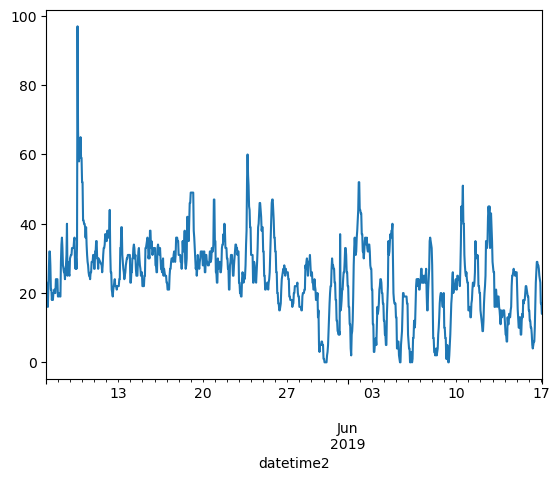

In [46]:
# did we get rid of the flat sequence at the end?
London5.plot()

<Axes: xlabel='datetime2'>

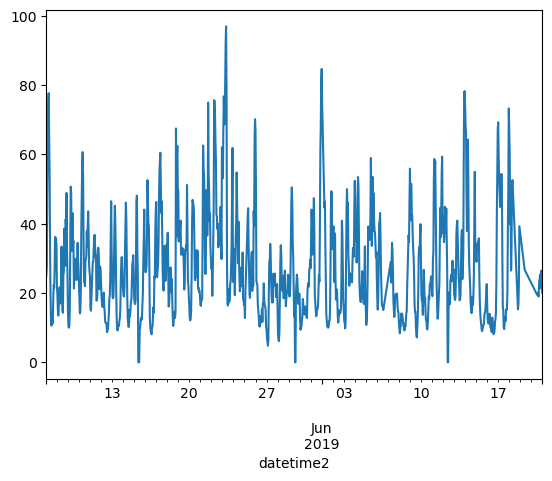

In [47]:
Paris4.plot()

## Epic data formatting now complete

Yow!

On to something interesting

In [54]:
## Seasonality and trend

<Figure size 2000x1000 with 0 Axes>

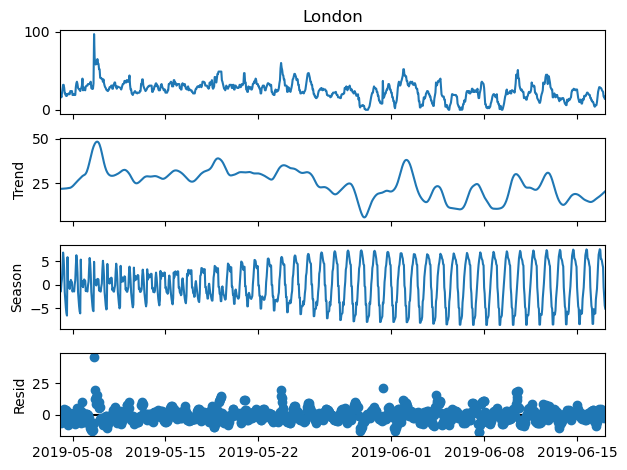

In [48]:
from statsmodels.tsa.seasonal import STL

plt.figure(figsize=(20,10))

stl = STL(London5, seasonal=25)
res = stl.fit()
fig = res.plot()

Probably not much of trend, but we might want to use first differencing anyway

The seasonality term is really clear, there is a 24 hour "seasonality here"

We can get the first difference easily from the diff() member function for Pandas series

<Figure size 2000x1000 with 0 Axes>

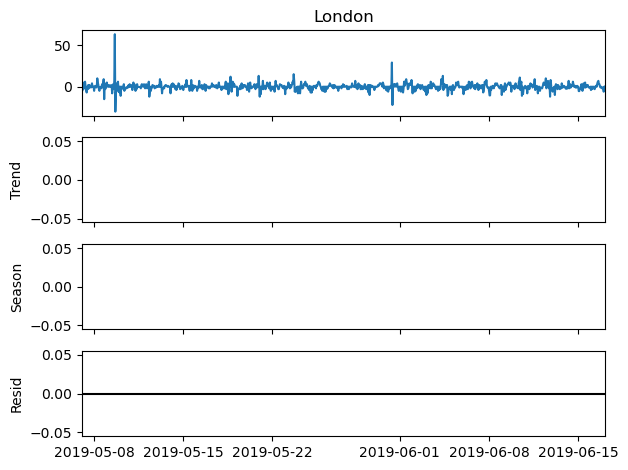

In [49]:
from statsmodels.tsa.seasonal import STL

plt.figure(figsize=(20,10))

stl = STL(London5.diff(), seasonal=25)
res = stl.fit()
fig = res.plot()

## Looking at Autocorrelation in the data

We know generated lagged version of the data.    If y(t) is our data at time t,  y(t-1) is the data at one time step (or period) back.

We can compute the autocorrelation of the data y(t) and y(t-1) for all t values, this is called the autocorrelation at lag 1

We cand compute this for any lag k,  k=1,2,3,... we want

In [50]:
import numpy as np

end=len(London5)

np.corrcoef(London5.iloc[0:(end-1)],London5.iloc[1:end])

array([[1.        , 0.92957132],
       [0.92957132, 1.        ]])

In this case,  there is a high correlation between each air quality value and the air quality in the previous hour, the correlation is 0.93,  so y(t-1) predicts y(t) pretty well

We can plot the autocorrelation value as a function of the lag k for our data set

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

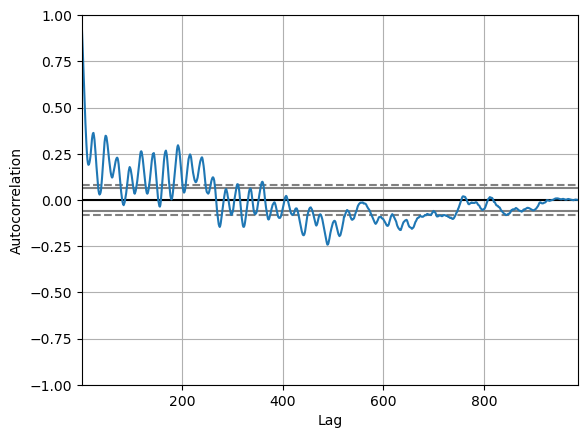

In [51]:
from pandas.plotting import autocorrelation_plot
plt.figure()
 
# Pass the autocorrelation argument and plot the values
autocorrelation_plot(London5)

# note the grey line is the 95% confidence interval for random data so autocorrlation outside this are not due to chance

(0.0, 200.0)

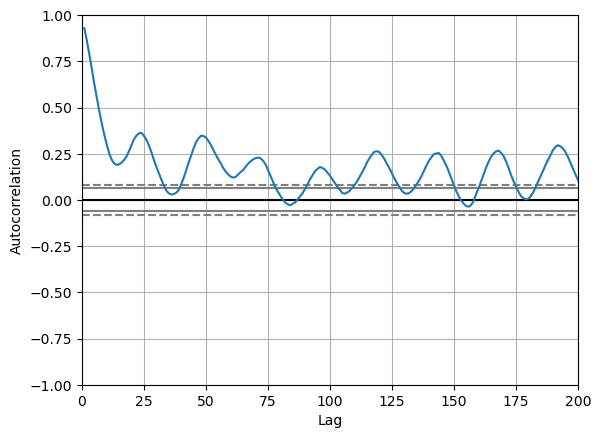

In [52]:
# not super helpful, we don't need to see this out to 800 hours

from pandas.plotting import autocorrelation_plot
plt.figure()
 
# Pass the autocorrelation argument and plot the values
autocorrelation_plot(London5)
plt.xlim(0,200)

Again, we have some autocorrelation at low values and a lot at 24 hours,  note the 24 hour repeating periods (ie 48,72, etc)

We will use 24 hour seasonality to represent this feature

Text(0.5, 1.0, 'Lag 72')

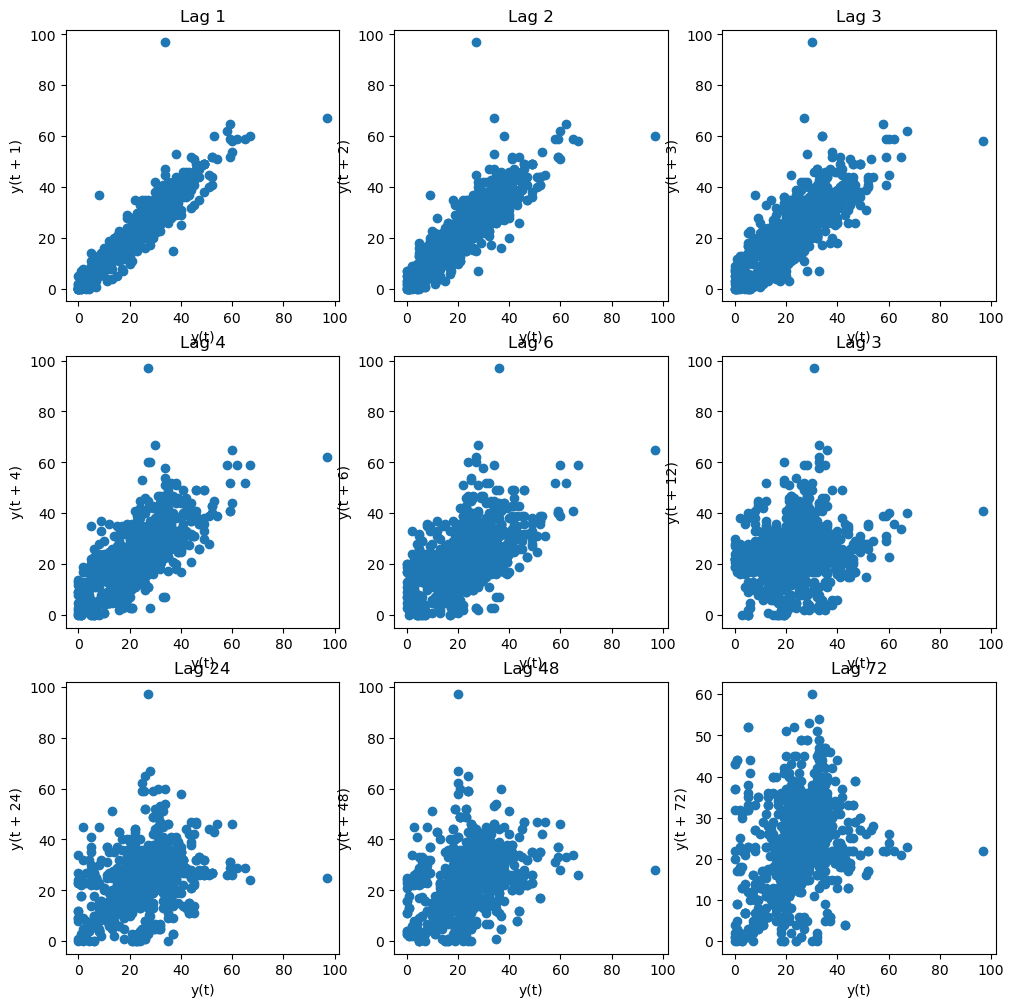

In [53]:
# we can do biplots of y(t) vs y(t-k) to see which lags are likely to be good predictors of y(t)

plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
pd.plotting.lag_plot(London5,lag=1);
plt.title("Lag 1")

plt.subplot(3,3,2)
pd.plotting.lag_plot(London5,lag=2);
plt.title("Lag 2")

plt.subplot(3,3,3)
pd.plotting.lag_plot(London5,lag=3);
plt.title("Lag 3")

plt.subplot(3,3,4)
pd.plotting.lag_plot(London5,lag=4);
plt.title("Lag 4")

plt.subplot(3,3,5)
pd.plotting.lag_plot(London5,lag=6);
plt.title("Lag 6")

plt.subplot(3,3,6)
pd.plotting.lag_plot(London5,lag=12);
plt.title("Lag 3")

plt.subplot(3,3,7)
pd.plotting.lag_plot(London5,lag=24);
plt.title("Lag 24")

plt.subplot(3,3,8)
pd.plotting.lag_plot(London5,lag=48);
plt.title("Lag 48")

plt.subplot(3,3,9)
pd.plotting.lag_plot(London5,lag=72);
plt.title("Lag 72")



In [ ]:
## This is another graph to show autocorrelaton vs lag (k) value

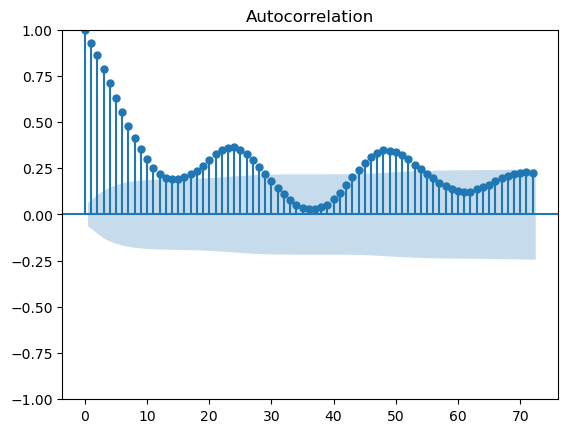

<Figure size 1000x600 with 0 Axes>

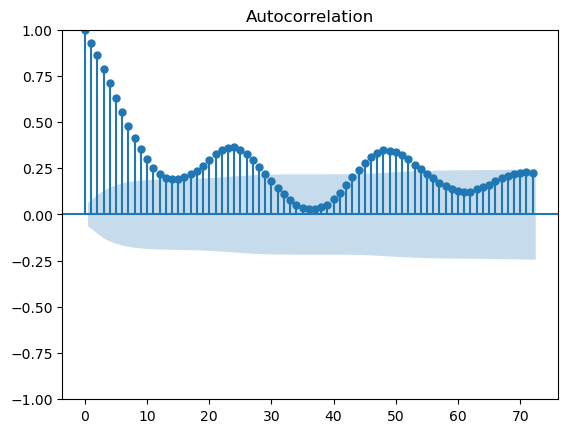

In [54]:
import statsmodels.graphics.tsaplots as tsp
plt.figure(figsize=(10,6))
tsp.plot_acf(London5,lags=72)

### Partial Autocorrelation

If y(t) is correlated with y(t-1),  and y(t-1) is correlated with y(t-2) then y(t) is correlationed with y(t-2),   automatically

So the autocorrelations are not independent.  What we really want is the partial autocorrelations

y(t) with y(t-1)

[y(t) given y(t-1)] with y(t-2),    really the correlation of y(t-2) with the residual variance in y(t) as predicted by y(t-1)

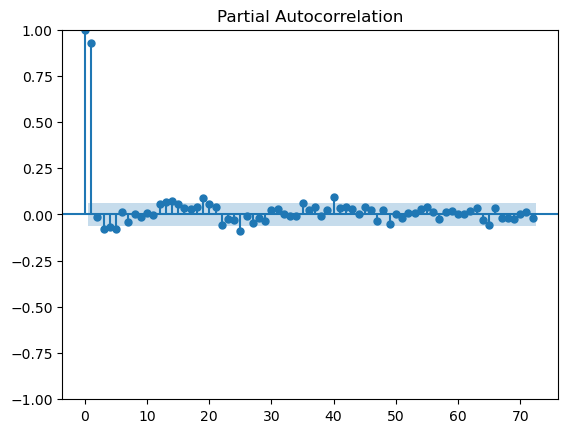

<Figure size 1000x600 with 0 Axes>

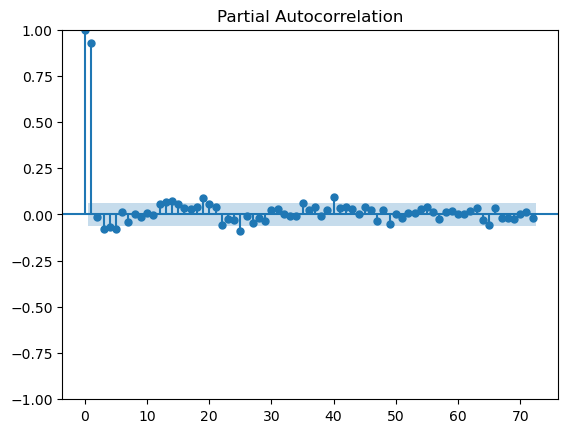

In [55]:
# partial autocorrelation plot

plt.figure(figsize=(10,6))
tsp.plot_pacf(London5,lags=72)

So we have Partial Autocorrelation at P=0 and P=1

Since we think we want to work with the first difference to remove the trend, lets look at ACF an PCA at difference = 1

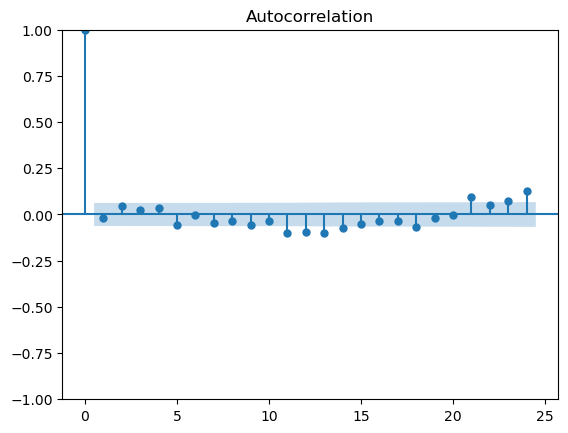

<Figure size 1000x600 with 0 Axes>

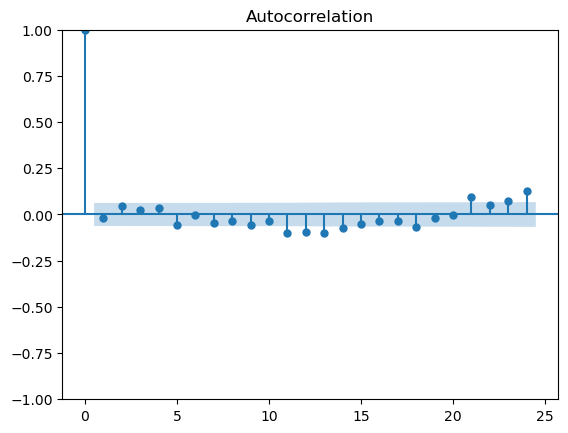

In [56]:
London5d=London5.diff().dropna()       # differencing can generate nans at the first time step

plt.figure(figsize=(10,6))
tsp.plot_acf(London5d,lags=24)

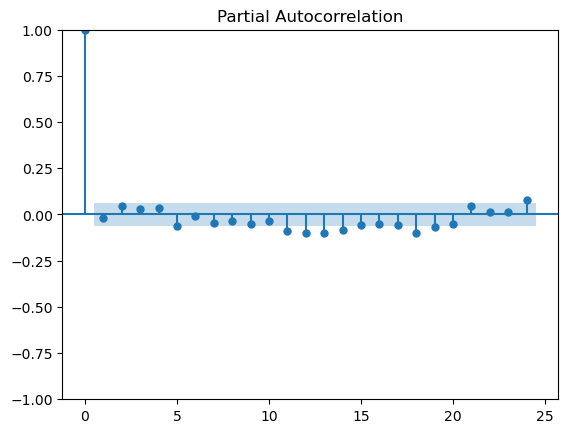

<Figure size 1000x600 with 0 Axes>

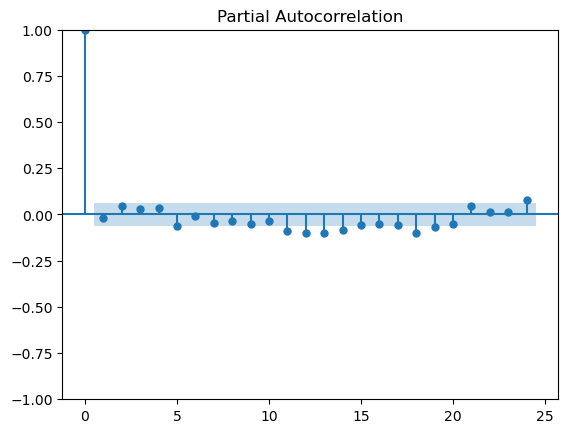

In [57]:
plt.figure(figsize=(10,6))
tsp.plot_pacf(London5d,lags=24, method='ywm')

## Conclusion of the trend, seasonality, ACF and PACF plots 

Okay, so not more than Q=1, P=1 with D=1 and Seasonality of 24 (in hours)

## Building Autoregressive Models

From the Partial Autocorrelation plot, it looks like lag 0 is correlated highy with y,  no surprise

Lag 1 is strong predictor,  lag2 is not,  lags 3,4,5 are weak, maybe 24 or 25?

https://www.statsmodels.org/devel/examples/notebooks/generated/autoregressions.html

Here is a single lag autoregressive model, just to look at a simple example, looking at a really simple model, just to see what it looks like

In practice, we will use more complex SARIMA programs,  these are just AR and MA examples

In [58]:
mod = AutoReg(London5, lags=1, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                 London   No. Observations:                  987
Model:                     AutoReg(1)   Log Likelihood               -2790.534
Method:               Conditional MLE   S.D. of innovations              4.101
Date:                Tue, 19 Mar 2024   AIC                           5587.068
Time:                        19:15:09   BIC                           5601.749
Sample:                    05-07-2019   HQIC                          5592.651
                         - 06-17-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7303      0.320      5.411      0.000       1.104       2.357
London.L1      0.9300      0.012     79.180      0.000       0.907       0.953
                                    Roots           

In [59]:
y_pred=res.predict()

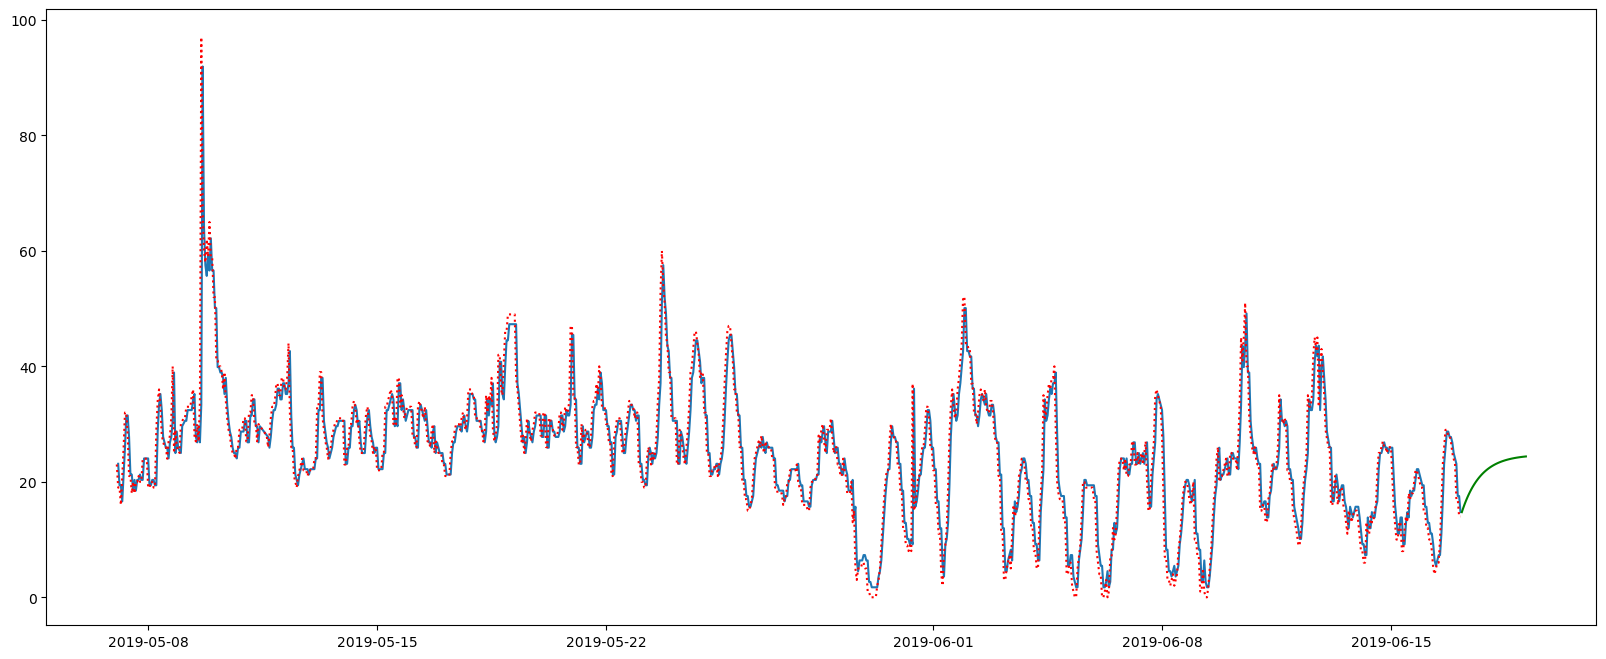

In [60]:
#res.plot_predict("2019-05-07 01:00:00+00:00","2019-06-17 10:00:00+00:00")

plt.figure(figsize=(20,8))

plt.plot(y_pred)

plt.plot(London5, alpha=1,linestyle=":",color='red')

forecast=res.forecast(steps=48)
forecast
plt.plot(forecast,color='g')

The AR model doesn't predict the 24 hour oscillation in this data

In [62]:
# Compute the summed squared error

sum(((y_pred-London5).dropna())**2)


16582.30145491935

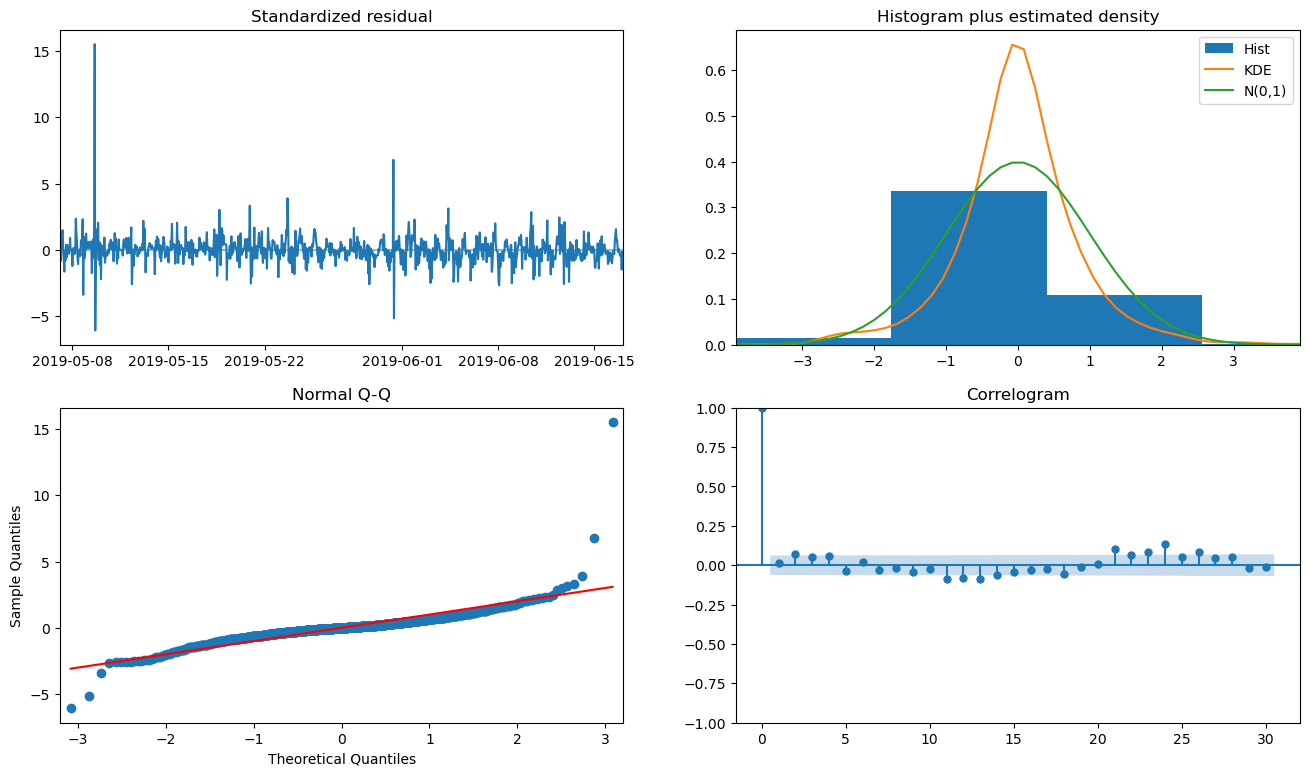

In [63]:
# now look at diagnostic plots of the performance of this P=1 autoregressive model

fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

The diagnostic plots don't look terrible,  there is not a lot of correlation of the residuals, except out a a lag of 24, the 24 hour periodicity which is not 
include in the model

The Q-Q plot does shouw a departure from normality at the extremes,  so the residuals aren't quite normal

In [64]:
# We will use the SARIMAX model to generate a pure MA model, 

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [65]:
P=0     # no AR
D=0    # no Differencing/Integration
Q=1    # MA order is 1

mod2 = SARIMAX(London5, order=[P,D,Q])
res2 = mod2.fit()
print(res2.summary())

                               SARIMAX Results                                
Dep. Variable:                 London   No. Observations:                  987
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -4091.787
Date:                Tue, 19 Mar 2024   AIC                           8187.574
Time:                        19:16:35   BIC                           8197.363
Sample:                    05-07-2019   HQIC                          8191.297
                         - 06-17-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8837      0.013     70.391      0.000       0.859       0.908
sigma2       233.2126     11.367     20.517      0.000     210.934     255.491
Ljung-Box (L1) (Q):                  29.75   Jarque-

In [66]:
y_pred2=res2.predict()
sum(((y_pred2-London5).dropna())**2)

230540.1676127548

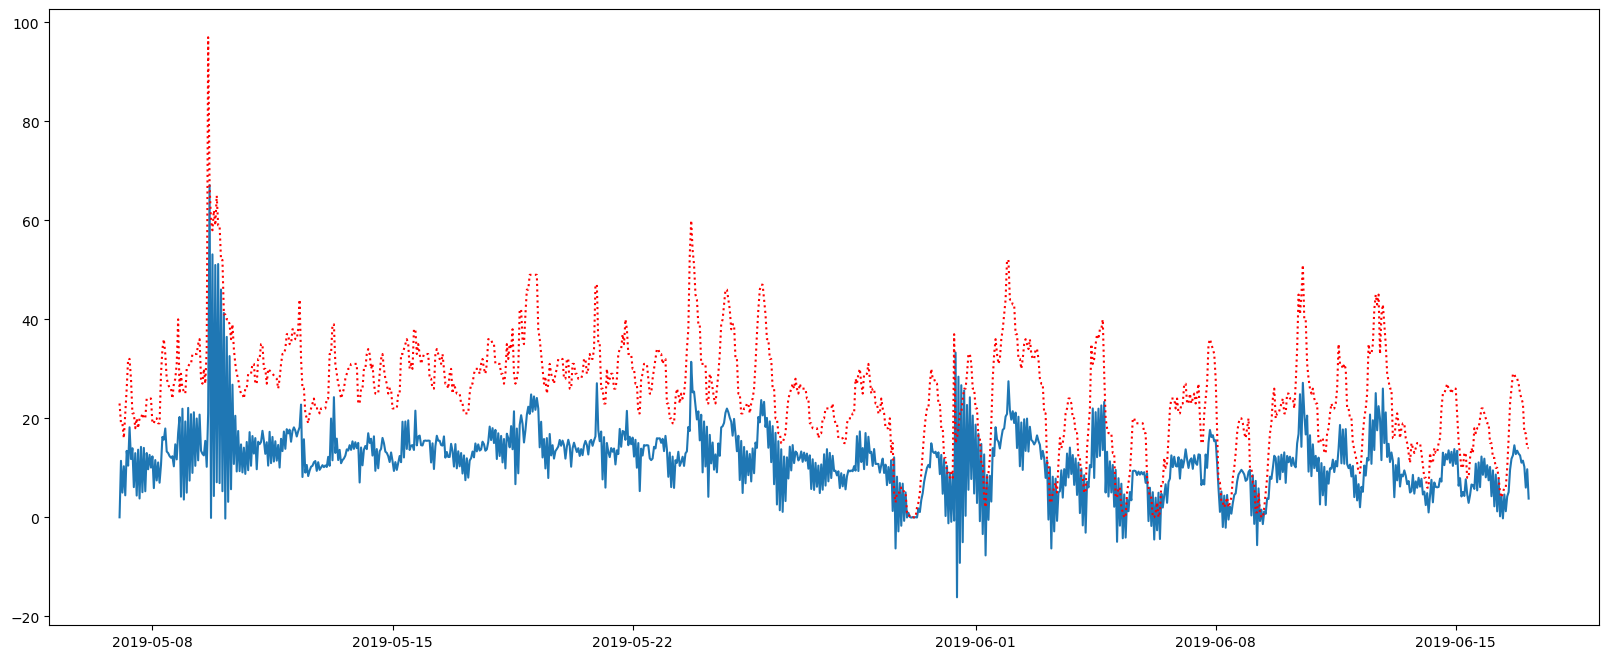

In [67]:

plt.figure(figsize=(20,8))

plt.plot(y_pred2)

plt.plot(London5, alpha=1,linestyle=":",color='red')

In [ ]:
# clearly, the moving average has an offset or trend problem,  lets's difference the data to fix that

In [68]:
P=0     # no AR
D=1    # no Differencing/Integration
Q=1    # MA order is 1

mod3 = SARIMAX(London5, order=[P,D,Q])
res3 = mod3.fit()
print(res3.summary())

                               SARIMAX Results                                
Dep. Variable:                 London   No. Observations:                  987
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2807.770
Date:                Tue, 19 Mar 2024   AIC                           5619.540
Time:                        19:16:59   BIC                           5629.327
Sample:                    05-07-2019   HQIC                          5623.263
                         - 06-17-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0197      0.009     -2.294      0.022      -0.037      -0.003
sigma2        17.4161      0.143    121.402      0.000      17.135      17.697
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [70]:
y_pred3=res3.predict()
sum(((y_pred3-London5).dropna())**2)

17701.306089588434

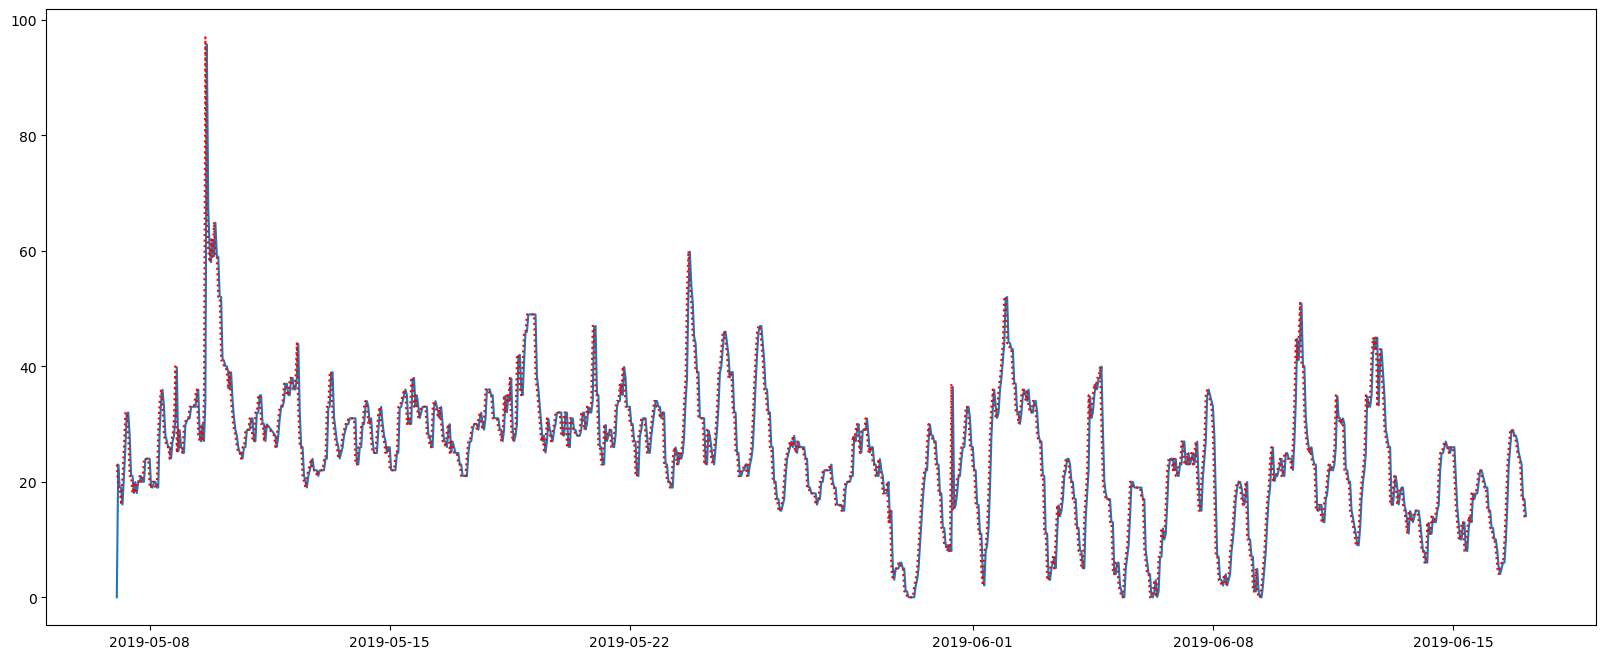

In [71]:
plt.figure(figsize=(20,8))

plt.plot(y_pred3)

plt.plot(London5, alpha=1,linestyle=":",color='red')

### Okay much better

The MA model didn't do well at all withoug differencing

Model              Squared Error            AIC
AR, P=1            16,582                  5587
MA, D=0,Q=1        230,540                 8187            This model missed the mean value,  it needs a trend term or a difference term
MA, D=1, Q=1       17,701                  5619            

The AR with P=1 is the best so far

Here is a full SARIMA model, with seasonality included, using a difference of 1, 

In [72]:
P=1,
D=1
Q=1

mod4 = SARIMAX(London5, order=[P,D,Q],seasonal_order=[1,0,1,24])
res4 = mod4.fit()
print(res4.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             London   No. Observations:                  987
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 24)   Log Likelihood               -2773.276
Date:                            Tue, 19 Mar 2024   AIC                           5556.551
Time:                                    19:20:39   BIC                           5581.019
Sample:                                05-07-2019   HQIC                          5565.857
                                     - 06-17-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0604      0.356      0.170      0.865      -0.637       0.758
ma.L1         -0.1254      0.355   

Note,  the ma.lag1 term is not significant, we should not include it,  see the Z value listing, the seasonality term is significant

Don't lag the seasonality

In [73]:
y_pred4=res4.predict()
sum(((y_pred4-London5).dropna())**2)

16730.94373899948

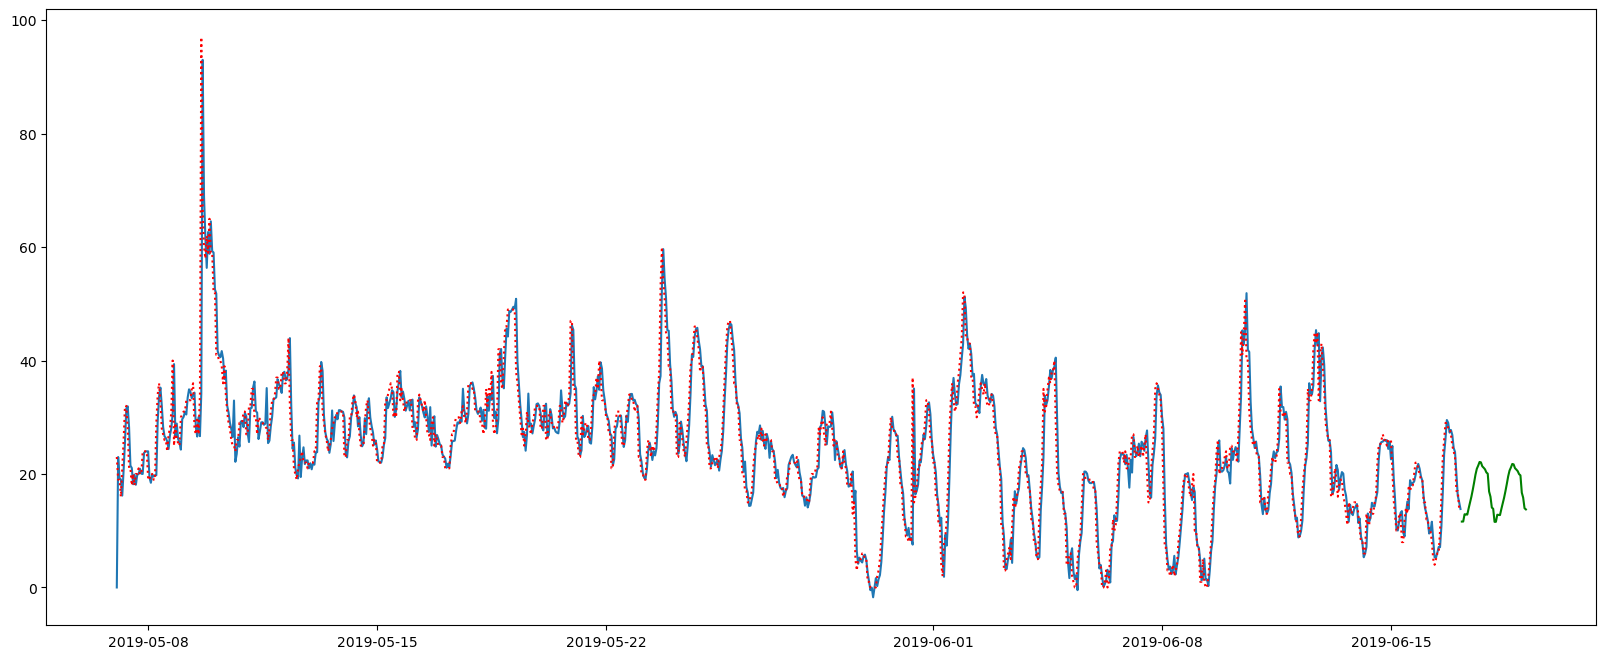

In [74]:
plt.figure(figsize=(20,8))

plt.plot(y_pred4)

plt.plot(London5, alpha=1,linestyle=":",color='red')


forecast4=res4.forecast(steps=48)
forecast4
plt.plot(forecast4,color='g')


In [ ]:
### One more model, since the Q=1 term was not significant

In [75]:
P=1,
D=1
Q=0

mod5 = SARIMAX(London5, order=[P,D,Q],seasonal_order=[1,0,1,24])
res5 = mod5.fit()
print(res5.summary())

                                      SARIMAX Results                                       
Dep. Variable:                               London   No. Observations:                  987
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 24)   Log Likelihood               -2773.310
Date:                              Tue, 19 Mar 2024   AIC                           5554.619
Time:                                      19:33:59   BIC                           5574.194
Sample:                                  05-07-2019   HQIC                          5562.064
                                       - 06-17-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0643      0.009     -6.990      0.000      -0.082      -0.046
ar.S.L24       0.97

In [76]:
y_pred5=res5.predict()
sum(((y_pred5-London5).dropna())**2)

16730.94688080511

C:\Users\dev46\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


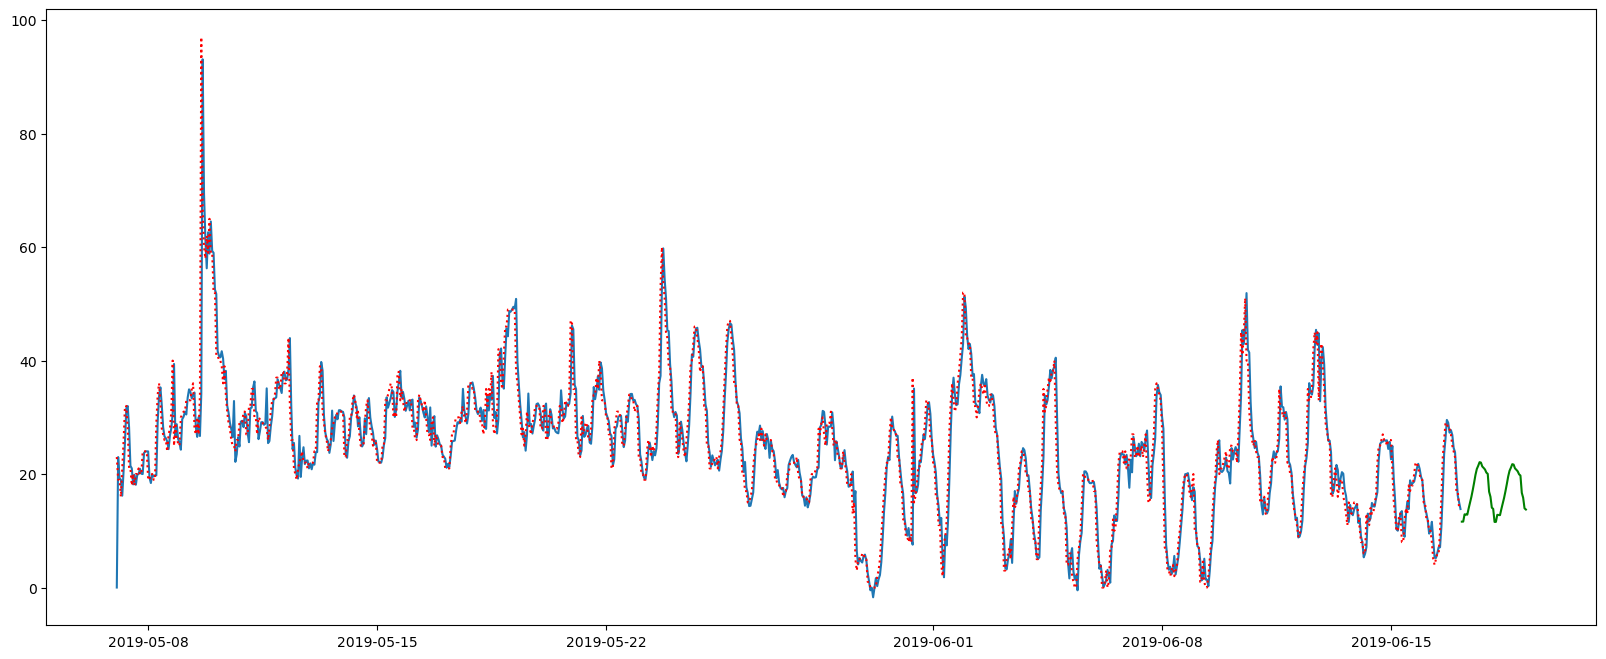

In [77]:
plt.figure(figsize=(20,8))

plt.plot(y_pred5)

plt.plot(London5, alpha=1,linestyle=":",color='red')


forecast5=res5.forecast(steps=48, alpha=0.05)
forecast5
plt.plot(forecast5,color='g')

### Okay much better,  which model should we use?



Model                   Squared Error            AIC
AR, P=1                  16,582                  5587
MA, D=0,Q=1              230,540                 8187            This model missed the mean value,  it needs a trend term or a difference term
MA, D=1, Q=1             17,701                  5619 

Models with Seasonality

SARIMA P=1,D=1, Q=1, S  16,730                    5556
SARIMA P=1,D=1, Q=0     16,730                    5554

The SARIMA P=1, D=1 Q=0 with seasonality 

### Hyper parameter search

The idea of hyperparameter searches is a bit foreign to time series analysis, but it would be worth pursing

Set the AIC value as the desired metric and run the search on P,Q,D and seasonality, using SARIMAX

### Diagnostic plots from the ARIMA tradition



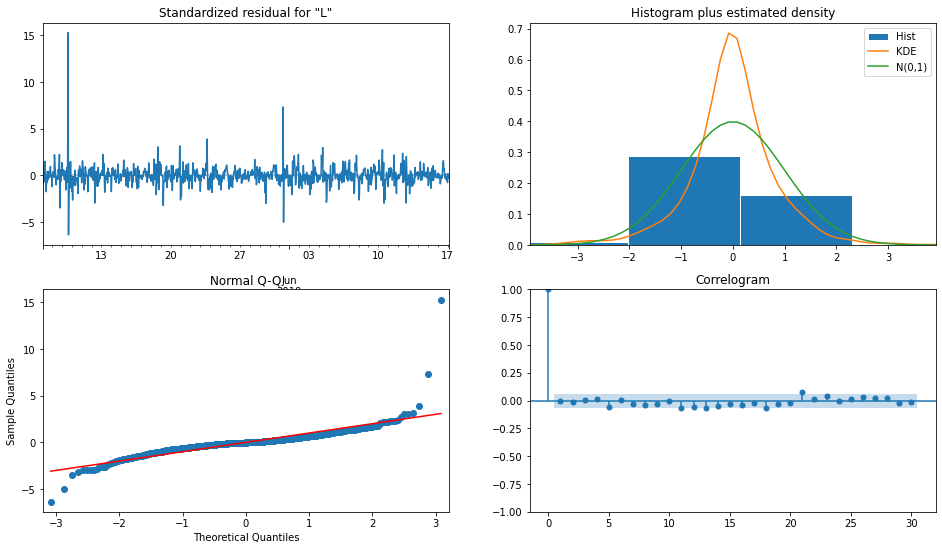

In [107]:
fig = plt.figure(figsize=(16, 9))
fig = res5.plot_diagnostics(fig=fig, lags=30)

The residual analyis above isn't ideal,  the QQ plot shows a couple of very high residuals, we can see the two big spikes inthe Standardized residuals
in the upper left plot.  I think we can just call those outliers and go on

The correlogram shows we got most of the autocorrelation models, not many points are outside the blue band indicating the 95% confidence interval
for random effects (except at lag=0, obviously)

The histogram looks plausible,  the kernel density estimate (kde) shows a shape a bit narrower than expected by a Gaussian,  which is called "kurtosis"
we can look at the ANOVA report to see that as well

In [108]:
print(res5.summary())

                                      SARIMAX Results                                       
Dep. Variable:                               London   No. Observations:                  987
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 24)   Log Likelihood               -2773.310
Date:                              Sun, 13 Mar 2022   AIC                           5554.619
Time:                                      13:55:20   BIC                           5574.194
Sample:                                  05-07-2019   HQIC                          5562.064
                                       - 06-17-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0643      0.009     -6.990      0.000      -0.082      -0.046
ar.S.L24       0.97

## Comments on the Results Summary

These are all "old-school" methods to try to decide how well a model is working.  These are all prior to cross validation methods, or test/train sets

Log Likelihood- This is a likelihood based model, so we are shown the log likelihood

AIC, BIC, HQIC- these are all information Criteria measures of the model
       AIC-Aikake information criteria- my preferred approach,  an estimate of the Kullback-Liebler distance
       BIC-Bayesian Information Critera- also good, picks simpler models
       HQIC- time for google!  Not one I use

Heteroskedasticity (H)- indicates the uniformity (or not) of the residuals over the time series-the probability of H being low indicates there is real 
       non-uniformity of residuals over time- there are two big "spike" residuals in the early part of the time series
    
Jarque-Bera Test-  this is test of whether the skew and Kurtosis are consistent with the normal distribution, the p of this is zero
                    
                   Skew measures bias or tilt of the distribution to either side,  ie departure from a symmetric normal distribution
                      it is related to the average cubed residual value,  which should be zero.   This is called the 3rd moment of the residual
                      This looks like a modest skew here
                
                   Kurtosis measures the "peaky-ness" or width/height ratio of the distribution,  it is related to the average residual to the 4th power
                       or the 4th moment of the distribution.   Kurtosis looks high here, the Q-Q plots sort of show that as well
                
                   The Jarque-Bera test indicates the residulas are not perfectly normal

Looking at the Covariance Type section,  all of our predictors have large magnitude Z valus, which P>|Z| indicates are not due to chance, there are bounds
                  on the values of the parameter estimates
        

# Prediction using SARIMA models

These models give you a prediciton, plus a confidence interval around the prediction, this is helpful.

Since ARIMA style models using lagged y values to predict,  errors accumulate as you predict y(t) at larger times from 
the last actual observed data point,  so the confidence interval explands rapidly

In a lot of economic situations, being able to predict even a couple of months ahead is a big deal though...

C:\Users\dev46\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


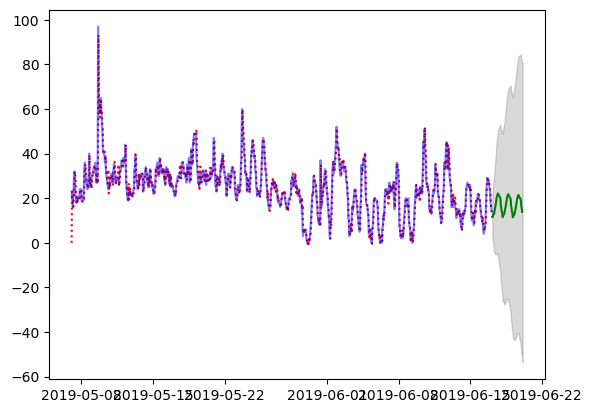

In [78]:
# Actual vs Fitted
ypred5=res5.predict(dynamic=False)
plt.plot(ypred5,color="red",linestyle=":")
plt.plot(London5,color="blue", alpha=0.5)

N_steps=72

dti=pd.date_range(np.datetime64('2019-06-17 03:00:00'),periods=N_steps,freq="H")

dti_s=dti.to_series()

dti.tz_localize(None)

dti2=pd.DatetimeIndex(dti,freq="H")

# get a forecast with confidence values

#forecast,se,conf 
temp=res5.get_forecast(N_steps,alpha=0.5)

#needs a time index of 24 steps

fc_series = pd.Series(temp.predicted_mean, index=dti2)

ci_vals=temp.conf_int()
lower_series = ci_vals['lower London']
upper_series = ci_vals['upper London']

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

plt.plot(fc_series,color='g')

https://www.kaggle.com/prashant111/arima-model-for-time-series-forecasting

In [118]:
%watermark -iv

easygui    : 0.98.1
statsmodels: 0.13.1
seaborn    : 0.11.2
matplotlib : 3.5.1
pandas     : 1.4.1
numpy      : 1.20.3



Windows Watermark -v,  on 3/13/2022

easygui    : 0.98.1
statsmodels: 0.13.1
seaborn    : 0.11.2
matplotlib : 3.5.1
pandas     : 1.4.1
numpy      : 1.20.3

In [124]:
## Save the data in the python pickled form

import pickle

pickle.dump(London5,open('C:\\Users\\hdavi\\Dropbox\\Data_Analytics\\DAT_512\\Example_data\\Italian Air Quality\\London5.pkl',"wb"))
            
pickle.dump(Paris4,open('C:\\Users\\hdavi\\Dropbox\\Data_Analytics\\DAT_512\\Example_data\\Italian Air Quality\\Paris4.pkl','wb'))

In [ ]:
### Question/Action

Build an ARIMA model of the Paris 4 data set,

Complete it in this notebook and upload it as a pdf

In [88]:
P=0,
D=1
Q=1

mod4 = SARIMAX(Paris4, order=[P,D,Q],seasonal_order=[1,0,1,24])
res4 = mod4.fit()
print(res4.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Paris   No. Observations:                 1080
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 24)   Log Likelihood               -3668.999
Date:                            Tue, 19 Mar 2024   AIC                           7345.998
Time:                                    19:56:03   BIC                           7365.933
Sample:                                05-07-2019   HQIC                          7353.547
                                     - 06-21-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0791      0.018      4.454      0.000       0.044       0.114
ar.S.L24       0.9970      0.005   

In [82]:
y_pred6=res4.predict()
sum(((y_pred6-Paris4).dropna())**2)

57527.36294581431

C:\Users\dev46\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


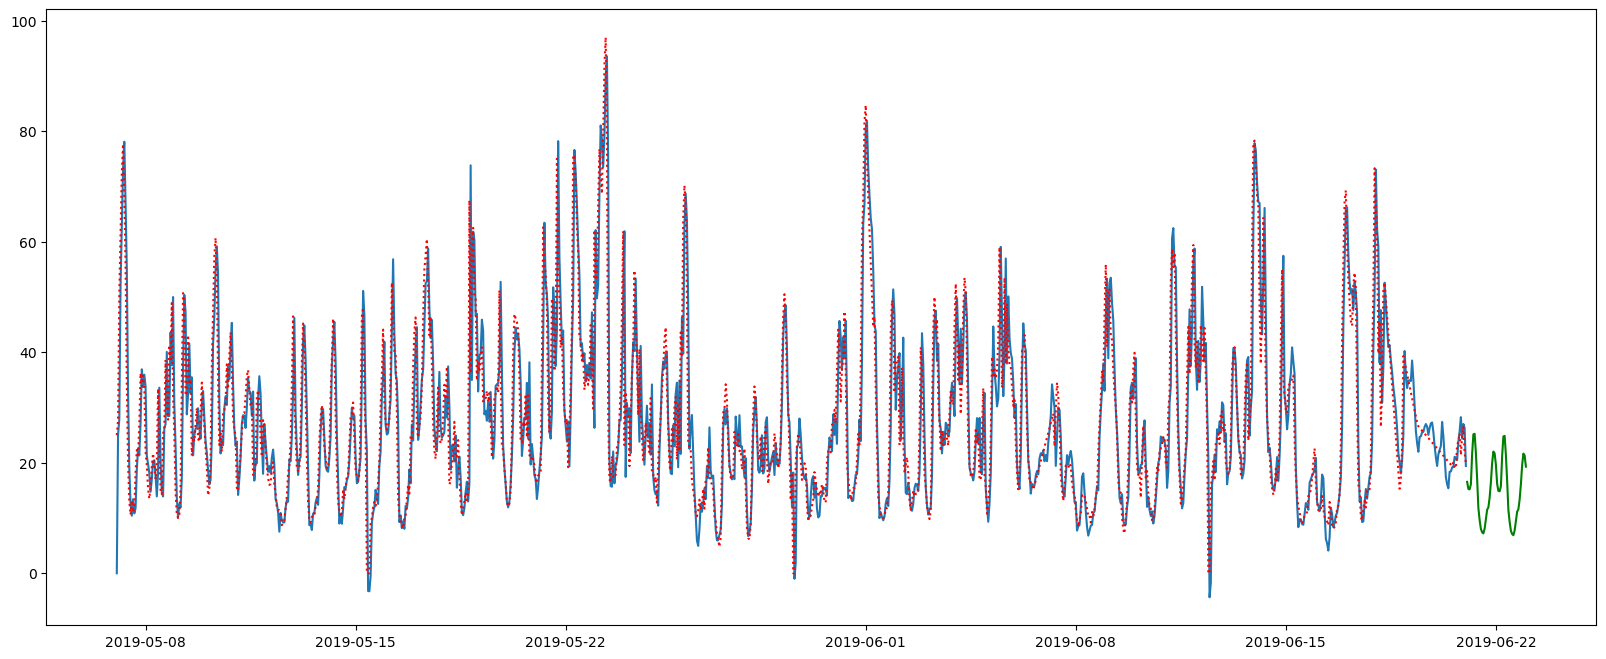

In [84]:
plt.figure(figsize=(20,8))

plt.plot(y_pred6)

plt.plot(Paris4, alpha=1,linestyle=":",color='red')


forecast5=res4.forecast(steps=48, alpha=0.05)
forecast5
plt.plot(forecast5,color='g')